## 1- Lyrics Generation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,LSTM, Dense, Embedding, Dropout, Concatenate, Flatten, Dot

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/final/rj_sample.csv')
df1.head()

,artist_farsi,song_farsi,likes,downloads,plays,lyric
0,عرفان و جیدال,شبای تهران مدگال فرشید,"5,352","2,985,993","2,985,993",مقدمه:\nمیگه جاتون بد خالیه\nمیگم نیستیم هم ان...
1,عرفان و جیدال,بده بره فرشید,"2,378","1,627,208","1,627,208",حالا با دارایی دایی\nپایداره آره ، بده بره\n\n...
2,عرفان و جیدال,مخزن راز,"2,719","1,378,413","1,378,413",آ آره ، دارا این یکی خیلی جالب بود\nحالا با دا...
3,عرفان و جیدال,همینه,"2,581","1,312,608","1,312,608",همینه همینه همینه همینه همینه\nهمینه همینه همی...
4,عرفان و جیدال,میشناسمش,"4,493","3,768,566","3,768,566",پایدار\nیادمه نبودن دور و ورم\nچیزایی رو که ال...


In [4]:
df1=df1.dropna(how='any')

In [5]:
max_num_words = 5000
max_sequence_length = 200
tokenizer = Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(df1['lyric'])
lyrics_seq = tokenizer.texts_to_sequences(df1['lyric'])
lyrics_padded = pad_sequences(lyrics_seq, maxlen=max_sequence_length)

2024-10-10 22:08:18.002397: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-10 22:08:18.531438: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-10 22:08:19.577327: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-10 22:08:22.897837: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
X, y = lyrics_padded[:, :-1], lyrics_padded[:, -1]
y = to_categorical(y, num_classes=max_num_words)

In [7]:
model1 = Sequential()
model1.add(Embedding(max_num_words, 100, input_length=max_sequence_length - 1))
model1.add(LSTM(150, return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(150))
model1.add(Dropout(0.2))
model1.add(Dense(max_num_words, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

/home/milad/Desktop/python/AI/DL/envDL/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
history1 = model1.fit(X, y, epochs=100, batch_size=16, verbose=1)

Epoch 1/100


2024-10-10 22:08:51.744244: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 40460000 exceeds 10% of free system memory.


 22/127 ━━━━━━━━━━━━━━━━━━━━ 57s 547ms/step - accuracy: 0.0130 - loss: 8.5068

KeyboardInterrupt: 

In [ ]:
def generate_lyrics(seed_text, next_words, model, max_seq_length):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted_class = np.argmax(predicted, axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_class:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

In [ ]:
print(generate_lyrics("من میرم", 10, model1, max_sequence_length))

من میرم میبینم بزنه قهر نیست دلمو تورو چک بگم برام بستم


## 2- Popularity Prediction Base on Played Music

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/final/rj_sample.csv')
df2.head()

,artist_farsi,song_farsi,likes,downloads,plays,lyric
0,عرفان و جیدال,شبای تهران مدگال فرشید,"5,352","2,985,993","2,985,993",مقدمه:\nمیگه جاتون بد خالیه\nمیگم نیستیم هم ان...
1,عرفان و جیدال,بده بره فرشید,"2,378","1,627,208","1,627,208",حالا با دارایی دایی\nپایداره آره ، بده بره\n\n...
2,عرفان و جیدال,مخزن راز,"2,719","1,378,413","1,378,413",آ آره ، دارا این یکی خیلی جالب بود\nحالا با دا...
3,عرفان و جیدال,همینه,"2,581","1,312,608","1,312,608",همینه همینه همینه همینه همینه\nهمینه همینه همی...
4,عرفان و جیدال,میشناسمش,"4,493","3,768,566","3,768,566",پایدار\nیادمه نبودن دور و ورم\nچیزایی رو که ال...


In [ ]:
df2=df2.dropna(how='any')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023 entries, 0 to 2022
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   artist_farsi  2023 non-null   object
 1   song_farsi    2023 non-null   object
 2   likes         2023 non-null   object
 3   downloads     2023 non-null   object
 4   plays         2023 non-null   object
 5   lyric         2023 non-null   object
dtypes: object(6)
memory usage: 95.0+ KB


In [ ]:
num_lst_columns = ['plays', 'downloads', 'likes']
for i in num_lst_columns:
  df2[i] = df2[i].str.replace(',', '').astype(int)
df2.head()

,artist_farsi,song_farsi,likes,downloads,plays,lyric
0,عرفان و جیدال,شبای تهران مدگال فرشید,5352,2985993,2985993,مقدمه:\nمیگه جاتون بد خالیه\nمیگم نیستیم هم ان...
1,عرفان و جیدال,بده بره فرشید,2378,1627208,1627208,حالا با دارایی دایی\nپایداره آره ، بده بره\n\n...
2,عرفان و جیدال,مخزن راز,2719,1378413,1378413,آ آره ، دارا این یکی خیلی جالب بود\nحالا با دا...
3,عرفان و جیدال,همینه,2581,1312608,1312608,همینه همینه همینه همینه همینه\nهمینه همینه همی...
4,عرفان و جیدال,میشناسمش,4493,3768566,3768566,پایدار\nیادمه نبودن دور و ورم\nچیزایی رو که ال...


In [ ]:
label_encoder_artist = LabelEncoder()
df2['artist_encoded'] = label_encoder_artist.fit_transform(df2['artist_farsi'])
label_encoder_song = LabelEncoder()
df2['song_encoded'] = label_encoder_song.fit_transform(df2['song_farsi'])

scaler = MinMaxScaler()
df2[['likes', 'downloads','plays']] = scaler.fit_transform(df2[['likes', 'downloads','plays']])

In [ ]:
df2.head()

,artist_farsi,song_farsi,likes,downloads,plays,lyric,artist_encoded,song_encoded
0,عرفان و جیدال,شبای تهران مدگال فرشید,0.056281,0.027543,0.027543,مقدمه:\nمیگه جاتون بد خالیه\nمیگم نیستیم هم ان...,198,1035
1,عرفان و جیدال,بده بره فرشید,0.024930,0.014997,0.014997,حالا با دارایی دایی\nپایداره آره ، بده بره\n\n...,198,241
2,عرفان و جیدال,مخزن راز,0.028525,0.012699,0.012699,آ آره ، دارا این یکی خیلی جالب بود\nحالا با دا...,198,1291
3,عرفان و جیدال,همینه,0.027070,0.012092,0.012092,همینه همینه همینه همینه همینه\nهمینه همینه همی...,198,1525
4,عرفان و جیدال,میشناسمش,0.047226,0.034769,0.034769,پایدار\nیادمه نبودن دور و ورم\nچیزایی رو که ال...,198,1404


In [ ]:
max_num_words = 5000
max_lyric_length = 200
tokenizer = Tokenizer(max_num_words)
tokenizer.fit_on_texts(df2['lyric'])
df2['lyric_tokenized'] = tokenizer.texts_to_sequences(df2['lyric'])
df2['lyric_padded'] = pad_sequences(df2['lyric_tokenized'], maxlen=max_lyric_length, padding='post').tolist()

In [ ]:
X_artist = df2['artist_encoded'].values
X_song = df2['song_encoded'].values
X_likes = df2['likes'].values
X_downloads = df2['downloads'].values
X_lyric = np.array(df2['lyric_padded'].tolist())
y = df2['plays'].values

X_train_artist, X_test_artist, X_train_song, X_test_song, X_train_likes, X_test_likes, X_train_downloads, X_test_downloads, X_train_lyric, X_test_lyric, y_train, y_test = train_test_split(
    X_artist, X_song, X_likes, X_downloads, X_lyric, y, test_size=0.2, random_state=42)

In [ ]:
input_artist = Input(shape=(1,), name='artist_input')
input_song = Input(shape=(1,), name='song_input')
input_likes = Input(shape=(1,), name='likes_input')
input_downloads = Input(shape=(1,), name='downloads_input')
input_lyric = Input(shape=(max_lyric_length,1,), name='lyric_input')

artist_embedding = Embedding(input_dim=len(df2['artist_encoded'].unique()), output_dim=16, input_length=1)(input_artist)
song_embedding = Embedding(input_dim=len(df2['song_encoded'].unique()), output_dim=16, input_length=1)(input_song)
artist_embedding_flat = Flatten()(artist_embedding)
song_embedding_flat = Flatten()(song_embedding)
lyric_lstm = LSTM(64)(input_lyric)
concatenated = Concatenate()([artist_embedding_flat, song_embedding_flat, input_likes, input_downloads, lyric_lstm])

dense = Dense(128, activation='relu')(concatenated)
dense = Dropout(0.3)(dense)
dense = Dense(64, activation='relu')(dense)
dense = Dropout(0.3)(dense)
output = Dense(1)(dense)

model2 = Model(inputs=[input_artist, input_song, input_likes, input_downloads, input_lyric], outputs=output)
model2.compile(optimizer='adam', loss='mean_squared_error')
model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ artist_input (InputLayer) │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ song_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, 1, 16)          │          5,728 │ artist_input[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_5 (Embedding)   │ (None, 1, 16)          │         29,632 │ song_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lyric_input (InputLayer)  │ (None, 200, 1)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_4 (Flatten)       │ (None, 16)             │              0 │ embedding_4[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_5 (Flatten)       │ (None, 16)             │              0 │ embedding_5[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ likes_input (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ downloads_input           │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 64)             │         16,896 │ lyric_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 98)             │              0 │ flatten_4[0][0],       │
│ (Concatenate)             │                        │                │ flatten_5[0][0],       │
│                           │                        │                │ likes_input[0][0],     │
│                           │                        │                │ downloads_input[0][0], │
│                           │                        │                │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 128)            │         12,672 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 128)            │              0 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 64)             │          8,256 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 64)             │              0 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 1)              │             65 │ dropout_5[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 73,249 (286.13 KB)

 Trainable params: 73,249 (286.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history2 = model2.fit([X_train_artist, X_train_song, X_train_likes, X_train_downloads, X_train_lyric],y_train,
    validation_data=([X_test_artist, X_test_song, X_test_likes, X_test_downloads, X_test_lyric], y_test),epochs=10,batch_size=32)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 0.0243 - val_loss: 0.0059
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 0.0052 - val_loss: 9.9984e-04
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 0.0020 - val_loss: 9.3777e-04
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 0.0016 - val_loss: 9.7883e-04
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - loss: 0.0013 - val_loss: 5.3791e-04
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - loss: 0.0013 - val_loss: 6.4930e-04
Epoch 9/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 0.0011 - val_loss: 7.3706e-04
Epoch 10/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 0.0011 - val_loss: 6.6010e-04


In [ ]:
loss = model2.evaluate([X_test_artist, X_test_song, X_test_likes, X_test_downloads, X_test_lyric], y_test)
print(f'Test Loss: {loss}')

predictions = model2.predict([X_test_artist, X_test_song, X_test_likes, X_test_downloads, X_test_lyric])

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 6.0603e-04
Test Loss: 0.0006600980996154249
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


In [ ]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

MSE: 0.0006600981569380933
RMSE: 0.025692375463123165
MAE: 0.017774358501526734
R²: 0.9561979212204861


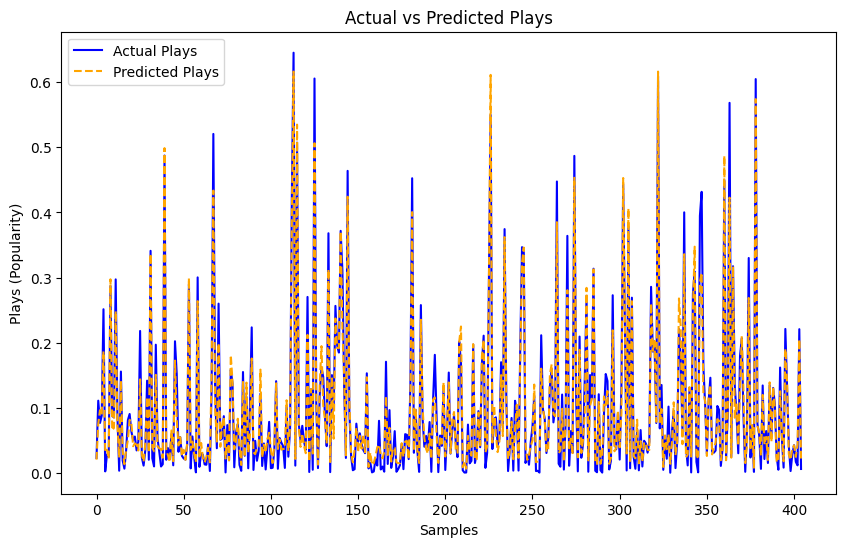

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Plays', color='blue')
plt.plot(predictions, label='Predicted Plays', color='orange', linestyle='dashed')
plt.title('Actual vs Predicted Plays')
plt.xlabel('Samples')
plt.ylabel('Plays (Popularity)')
plt.legend()
plt.show()

## 3- Recommendation System

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/final/rj_sample.csv')
df3.head()

,artist_farsi,song_farsi,likes,downloads,plays,lyric
0,عرفان و جیدال,شبای تهران مدگال فرشید,"5,352","2,985,993","2,985,993",مقدمه:\nمیگه جاتون بد خالیه\nمیگم نیستیم هم ان...
1,عرفان و جیدال,بده بره فرشید,"2,378","1,627,208","1,627,208",حالا با دارایی دایی\nپایداره آره ، بده بره\n\n...
2,عرفان و جیدال,مخزن راز,"2,719","1,378,413","1,378,413",آ آره ، دارا این یکی خیلی جالب بود\nحالا با دا...
3,عرفان و جیدال,همینه,"2,581","1,312,608","1,312,608",همینه همینه همینه همینه همینه\nهمینه همینه همی...
4,عرفان و جیدال,میشناسمش,"4,493","3,768,566","3,768,566",پایدار\nیادمه نبودن دور و ورم\nچیزایی رو که ال...


In [ ]:
num_lst_columns = ['plays', 'downloads', 'likes']
for i in num_lst_columns:
  df3[i] = df3[i].str.replace(',', '').astype(int)
df3.head()

,artist_farsi,song_farsi,likes,downloads,plays,lyric
0,عرفان و جیدال,شبای تهران مدگال فرشید,5352,2985993,2985993,مقدمه:\nمیگه جاتون بد خالیه\nمیگم نیستیم هم ان...
1,عرفان و جیدال,بده بره فرشید,2378,1627208,1627208,حالا با دارایی دایی\nپایداره آره ، بده بره\n\n...
2,عرفان و جیدال,مخزن راز,2719,1378413,1378413,آ آره ، دارا این یکی خیلی جالب بود\nحالا با دا...
3,عرفان و جیدال,همینه,2581,1312608,1312608,همینه همینه همینه همینه همینه\nهمینه همینه همی...
4,عرفان و جیدال,میشناسمش,4493,3768566,3768566,پایدار\nیادمه نبودن دور و ورم\nچیزایی رو که ال...


In [ ]:
df3['interaction_score'] = df3['plays'] * 0.5 + df3['likes'] * 0.3 + df3['downloads'] * 0.2

artist_encoder = df3['artist_farsi'].astype('category').cat.codes.values
song_encoder = df3['song_farsi'].astype('category').cat.codes.values

df3['artist_encoded'] = artist_encoder
df3['song_encoded'] = song_encoder

df3.head()

,artist_farsi,song_farsi,likes,downloads,plays,lyric,interaction_score,artist_encoded,song_encoded
0,عرفان و جیدال,شبای تهران مدگال فرشید,5352,2985993,2985993,مقدمه:\nمیگه جاتون بد خالیه\nمیگم نیستیم هم ان...,2091800.7,198,1035
1,عرفان و جیدال,بده بره فرشید,2378,1627208,1627208,حالا با دارایی دایی\nپایداره آره ، بده بره\n\n...,1139759.0,198,241
2,عرفان و جیدال,مخزن راز,2719,1378413,1378413,آ آره ، دارا این یکی خیلی جالب بود\nحالا با دا...,965704.8,198,1291
3,عرفان و جیدال,همینه,2581,1312608,1312608,همینه همینه همینه همینه همینه\nهمینه همینه همی...,919599.9,198,1525
4,عرفان و جیدال,میشناسمش,4493,3768566,3768566,پایدار\nیادمه نبودن دور و ورم\nچیزایی رو که ال...,2639344.1,198,1404


In [ ]:
scaler = StandardScaler()
df3[['interaction_score']] = scaler.fit_transform(df3[['interaction_score']])

In [ ]:
X_artist = df3['artist_encoded'].values
X_song = df3['song_encoded'].values
y = df3['interaction_score'].values

X_artist_train, X_artist_test, X_song_train, X_song_test, y_train, y_test = train_test_split(
    X_artist, X_song, y, test_size=0.2, random_state=42)

In [ ]:
artist_input = Input(shape=(1,), name='artist_input')
song_input = Input(shape=(1,), name='song_input')

artist_embedding = Embedding(input_dim=len(np.unique(X_artist)), output_dim=16, name='artist_embedding')(artist_input)
artist_embedding = Flatten()(artist_embedding)

song_embedding = Embedding(input_dim=len(np.unique(X_song)), output_dim=16, name='song_embedding')(song_input)
song_embedding = Flatten()(song_embedding)

dot_product = Dot(axes=1)([artist_embedding, song_embedding])

output = dot_product

model3 = Model(inputs=[artist_input, song_input], outputs=output)
model3.compile(optimizer=Adam(), loss='mean_squared_error')
model3.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ artist_input (InputLayer) │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ song_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ artist_embedding          │ (None, 1, 16)          │          5,728 │ artist_input[0][0]     │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ song_embedding            │ (None, 1, 16)          │         29,632 │ song_input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 16)             │              0 │ artist_embedding[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 16)             │              0 │ song_embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dot_1 (Dot)               │ (None, 1)              │              0 │ flatten_2[0][0],       │
│                           │                        │                │ flatten_3[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 35,360 (138.12 KB)

 Trainable params: 35,360 (138.12 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history3 = model3.fit([X_artist_train, X_song_train], y_train,
                    validation_data=([X_artist_test, X_song_test], y_test),
                    epochs=100, batch_size=64)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 1.0604 - val_loss: 1.1074
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9327 - val_loss: 1.1074
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1085 - val_loss: 1.1074
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0520 - val_loss: 1.1074
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9947 - val_loss: 1.1073
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9744 - val_loss: 1.1073
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0988 - val_loss: 1.1072
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9148 - val_loss: 1.1071
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8689 - val_loss: 1.1069
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8125 - val_loss: 1.1067
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8128 - val_loss: 1.1066
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.

In [ ]:
loss = model3.evaluate([X_artist_test, X_song_test], y_test)
print(f'Test Loss: {loss}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0037  
Test Loss: 1.1215355396270752


In [ ]:
mean_plays = df3['plays'].mean()
std_plays = df3['plays'].std()
real_scores = predictions * std_plays + mean_plays

In [ ]:
predictions = model3.predict([X_artist_test, X_song_test])

for i in range(5):
    print(f'Artist ID: {X_artist_test[i]}, Song ID: {X_song_test[i]}, Predicted Score: {real_scores[i][0]}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Artist ID: 349, Song ID: 1356, Predicted Score: 9358642.0
Artist ID: 19, Song ID: 1097, Predicted Score: 9548518.0
Artist ID: 152, Song ID: 1480, Predicted Score: 9387454.0
Artist ID: 345, Song ID: 1613, Predicted Score: 8867468.0
Artist ID: 160, Song ID: 723, Predicted Score: 9864509.0
